<a href="https://colab.research.google.com/github/larsmoan/COMP3710/blob/main/fractals_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
print("PyTorch Version:", torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} for computation")

PyTorch Version: 2.0.1
Using cpu for computation


In [2]:
def mandelbrot(start: float = 2.0, end: float = 2.0, resolution: float = 0.005):

    Y, X = np.mgrid[-start:start:resolution, -end:end:resolution]
    
    # load into PyTorch tensors
    x = torch.Tensor(X)
    y = torch.Tensor(Y)
    z = torch.complex(x, y) #important! zs = z.clone() #Updated!
    zs = z.clone() #Updated!
    ns = torch.zeros_like(z)

    # transfer to the GPU device
    z = z.to(device)
    zs = zs.to(device)
    ns = ns.to(device)

    for i in range(200):
        #Compute the new values of z: z^2 + c
        zs_ = zs**2 +  z
        #Have we diverged with this new value?
        not_diverged = torch.abs(zs_) < 4
        ns += not_diverged
        zs = zs_

    return ns.cpu().numpy()

In [6]:
def julia(start: float = 2., end: float = 2, resolution: float = 0.005):
    Y, X = np.mgrid[-start:start:resolution, -end:end:resolution]
    
    # load into PyTorch tensors
    x = torch.Tensor(X)
    y = torch.Tensor(Y)
    z = 1/2*torch.complex(x, y) #important! zs = z.clone() #Updated!
    zs = z.clone() #Updated!
    ns = torch.zeros_like(z)

    # transfer to the GPU device
    z = z.to(device)
    zs = zs.to(device)
    ns = ns.to(device)

    for i in range(200):
        #Compute the new values of z: z^2 + c
        zs_ = zs**2 - 0.8 + 0.156j
        #Have we diverged with this new value?
        not_diverged = torch.abs(zs_) < 5
        ns += not_diverged
        zs = zs_

    return ns.cpu().numpy()

/var/folders/c_/vg1wxx7s1sj4zyt54m8xyx240000gn/T/ipykernel_6661/380266527.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


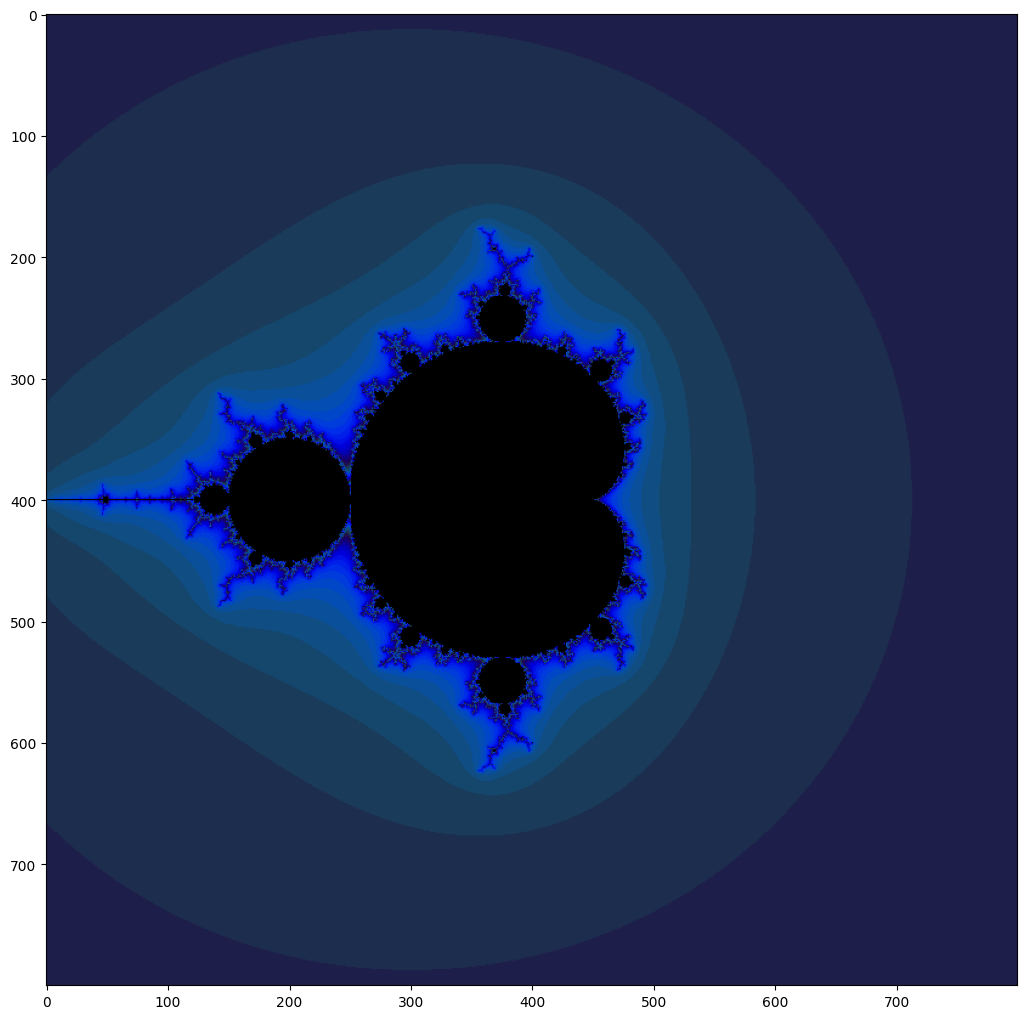

In [4]:
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
                colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(mandelbrot()))
plt.tight_layout(pad=0)
plt.show()

/var/folders/c_/vg1wxx7s1sj4zyt54m8xyx240000gn/T/ipykernel_6661/380266527.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


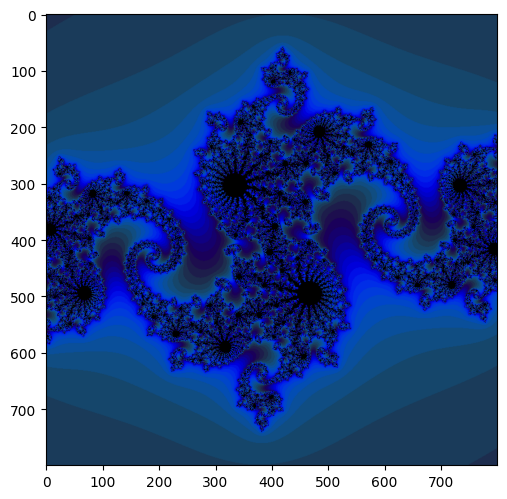

In [7]:
plt.imshow(processFractal(julia()))
plt.tight_layout(pad=0)
plt.show()